In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
strip_first = lambda x: int(str(x)[0])
strip_first_vec = np.vectorize(strip_first)

# Retrieve precinct-level for Campbell County, WY here
# https://sos.wyo.gov/Elections/Docs/2020/Results/General/2020_Laramie_County_General_PbP.pdf
# I manually converted the PDF to a CSV

df = pd.read_csv('laramie-2020.csv', header=0, index_col=0)
df

,Trump,Biden,Jorgensen,Pierce,Write-Ins,Overvotes,Undervotes,Total Ballots Cast
Precinct,,,,,,,,
1-1,829,552,50,16,13,1,10,"1,471"
1-2,458,395,41,6,8,0,4,912
1-3,435,415,20,9,10,0,7,896
1-4,204,257,11,2,8,1,3,486
1-5,340,349,18,10,12,0,3,732
...,...,...,...,...,...,...,...,...
7-1,77,46,11,2,2,0,0,138
7-2,17,6,0,0,0,0,0,23
7-3,104,39,3,3,1,0,0,150


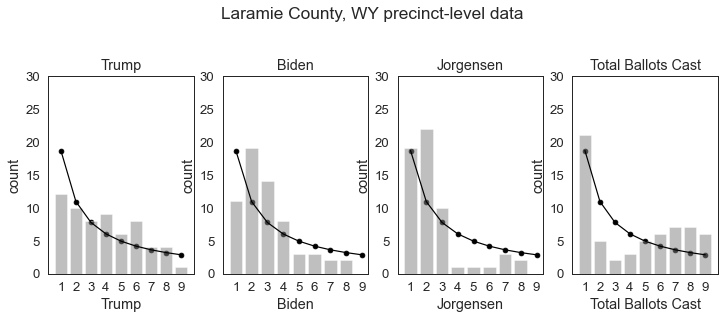

In [38]:
def plot_benford(who, df,ymax=30):
    sns.countplot(x=df[who].apply(strip_first), color='grey',
              order = [1,2,3,4,5,6,7,8,9],
              alpha=.5)
    plt.scatter(np.arange(9),
                np.log10(1 + 1/(np.arange(9)+1))*df[who].shape[0],
               color='black')
    plt.plot(np.arange(9),
                np.log10(1 + 1/(np.arange(9)+1))*df[who].shape[0],
               color='black')
    plt.title(who)
    plt.ylim(0,ymax)

plt.figure(figsize=(12,8))
plt.suptitle('Laramie County, WY precinct-level data', y=1)
sns.set_context('paper',font_scale=1.5)
sns.set_style('white')

cols = df.columns.to_list()[:3] + df.columns.to_list()[7:]
for idx,candidate in enumerate(cols):
    plt.subplot(2,4,idx+1)
    plot_benford(candidate,df)
plt.show()